2105208_MILAN KUMAR SAHOO

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import confusion_matrix,mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
import seaborn as sns #data visualisation

import warnings
warnings.filterwarnings('ignore')


In [2]:
# loading the data from sklearn
df = pd.read_csv('/content/breast_cancer.csv')

In [3]:
# printing the first 5 rows of the dataframe
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# number of rows and columns in the dataframe
df.shape

(569, 33)

In [5]:
# getting more information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
# getting more information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
# getting some statistical measures about the data
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [8]:

# distribution of target Variable
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [9]:
#encoding the target column
from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder()

labels = label_encode.fit_transform(df["diagnosis"])

df["target"] = labels

df.drop(columns = "diagnosis", axis = 1, inplace = True)

In [10]:
df["target"].value_counts()
#0--> Benign
#1 --> Malignant

0    357
1    212
Name: target, dtype: int64

In [11]:
# grouping the data bas3ed on the target variable
df.groupby('target').mean()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
target,,,,,,,,,,,,,,,,,,,,,
0,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442,NaN
1,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530,NaN


### DATA VISUALISATION

<Axes: xlabel='target', ylabel='count'>

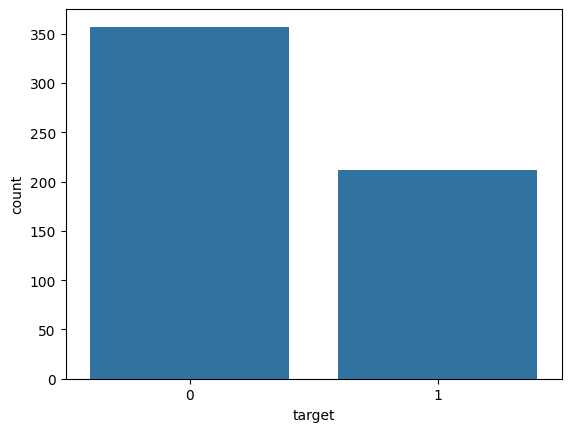

In [12]:
# target countplot
sns.countplot(x = 'target',data = df)

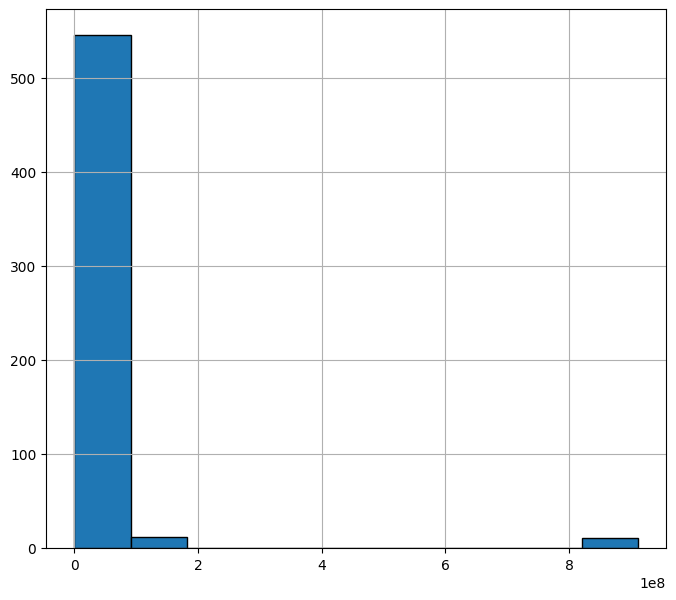

In [13]:
# Plot the histogram of the id variable
plt.figure(figsize=(8,7))
df["id"].hist(edgecolor = "black");

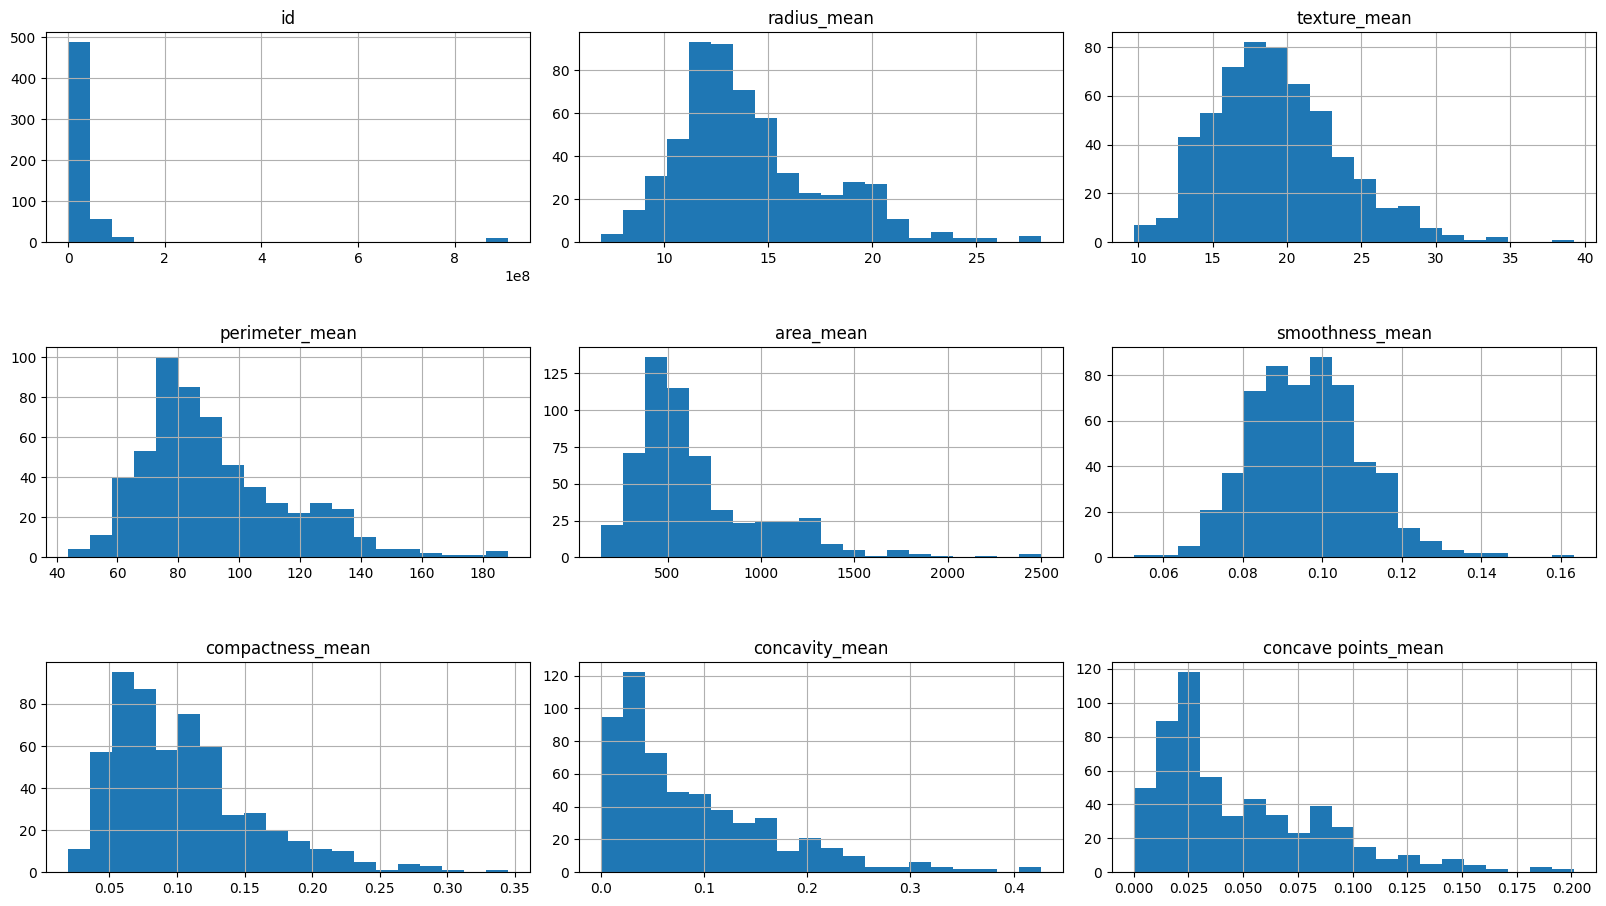

In [14]:
# Histogram of each feature
import itertools

col = df.columns[:9]
plt.subplots(figsize = (20, 15))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot(int((length/2)), 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    df[i].hist(bins = 20)
    plt.title(i)
plt.show()

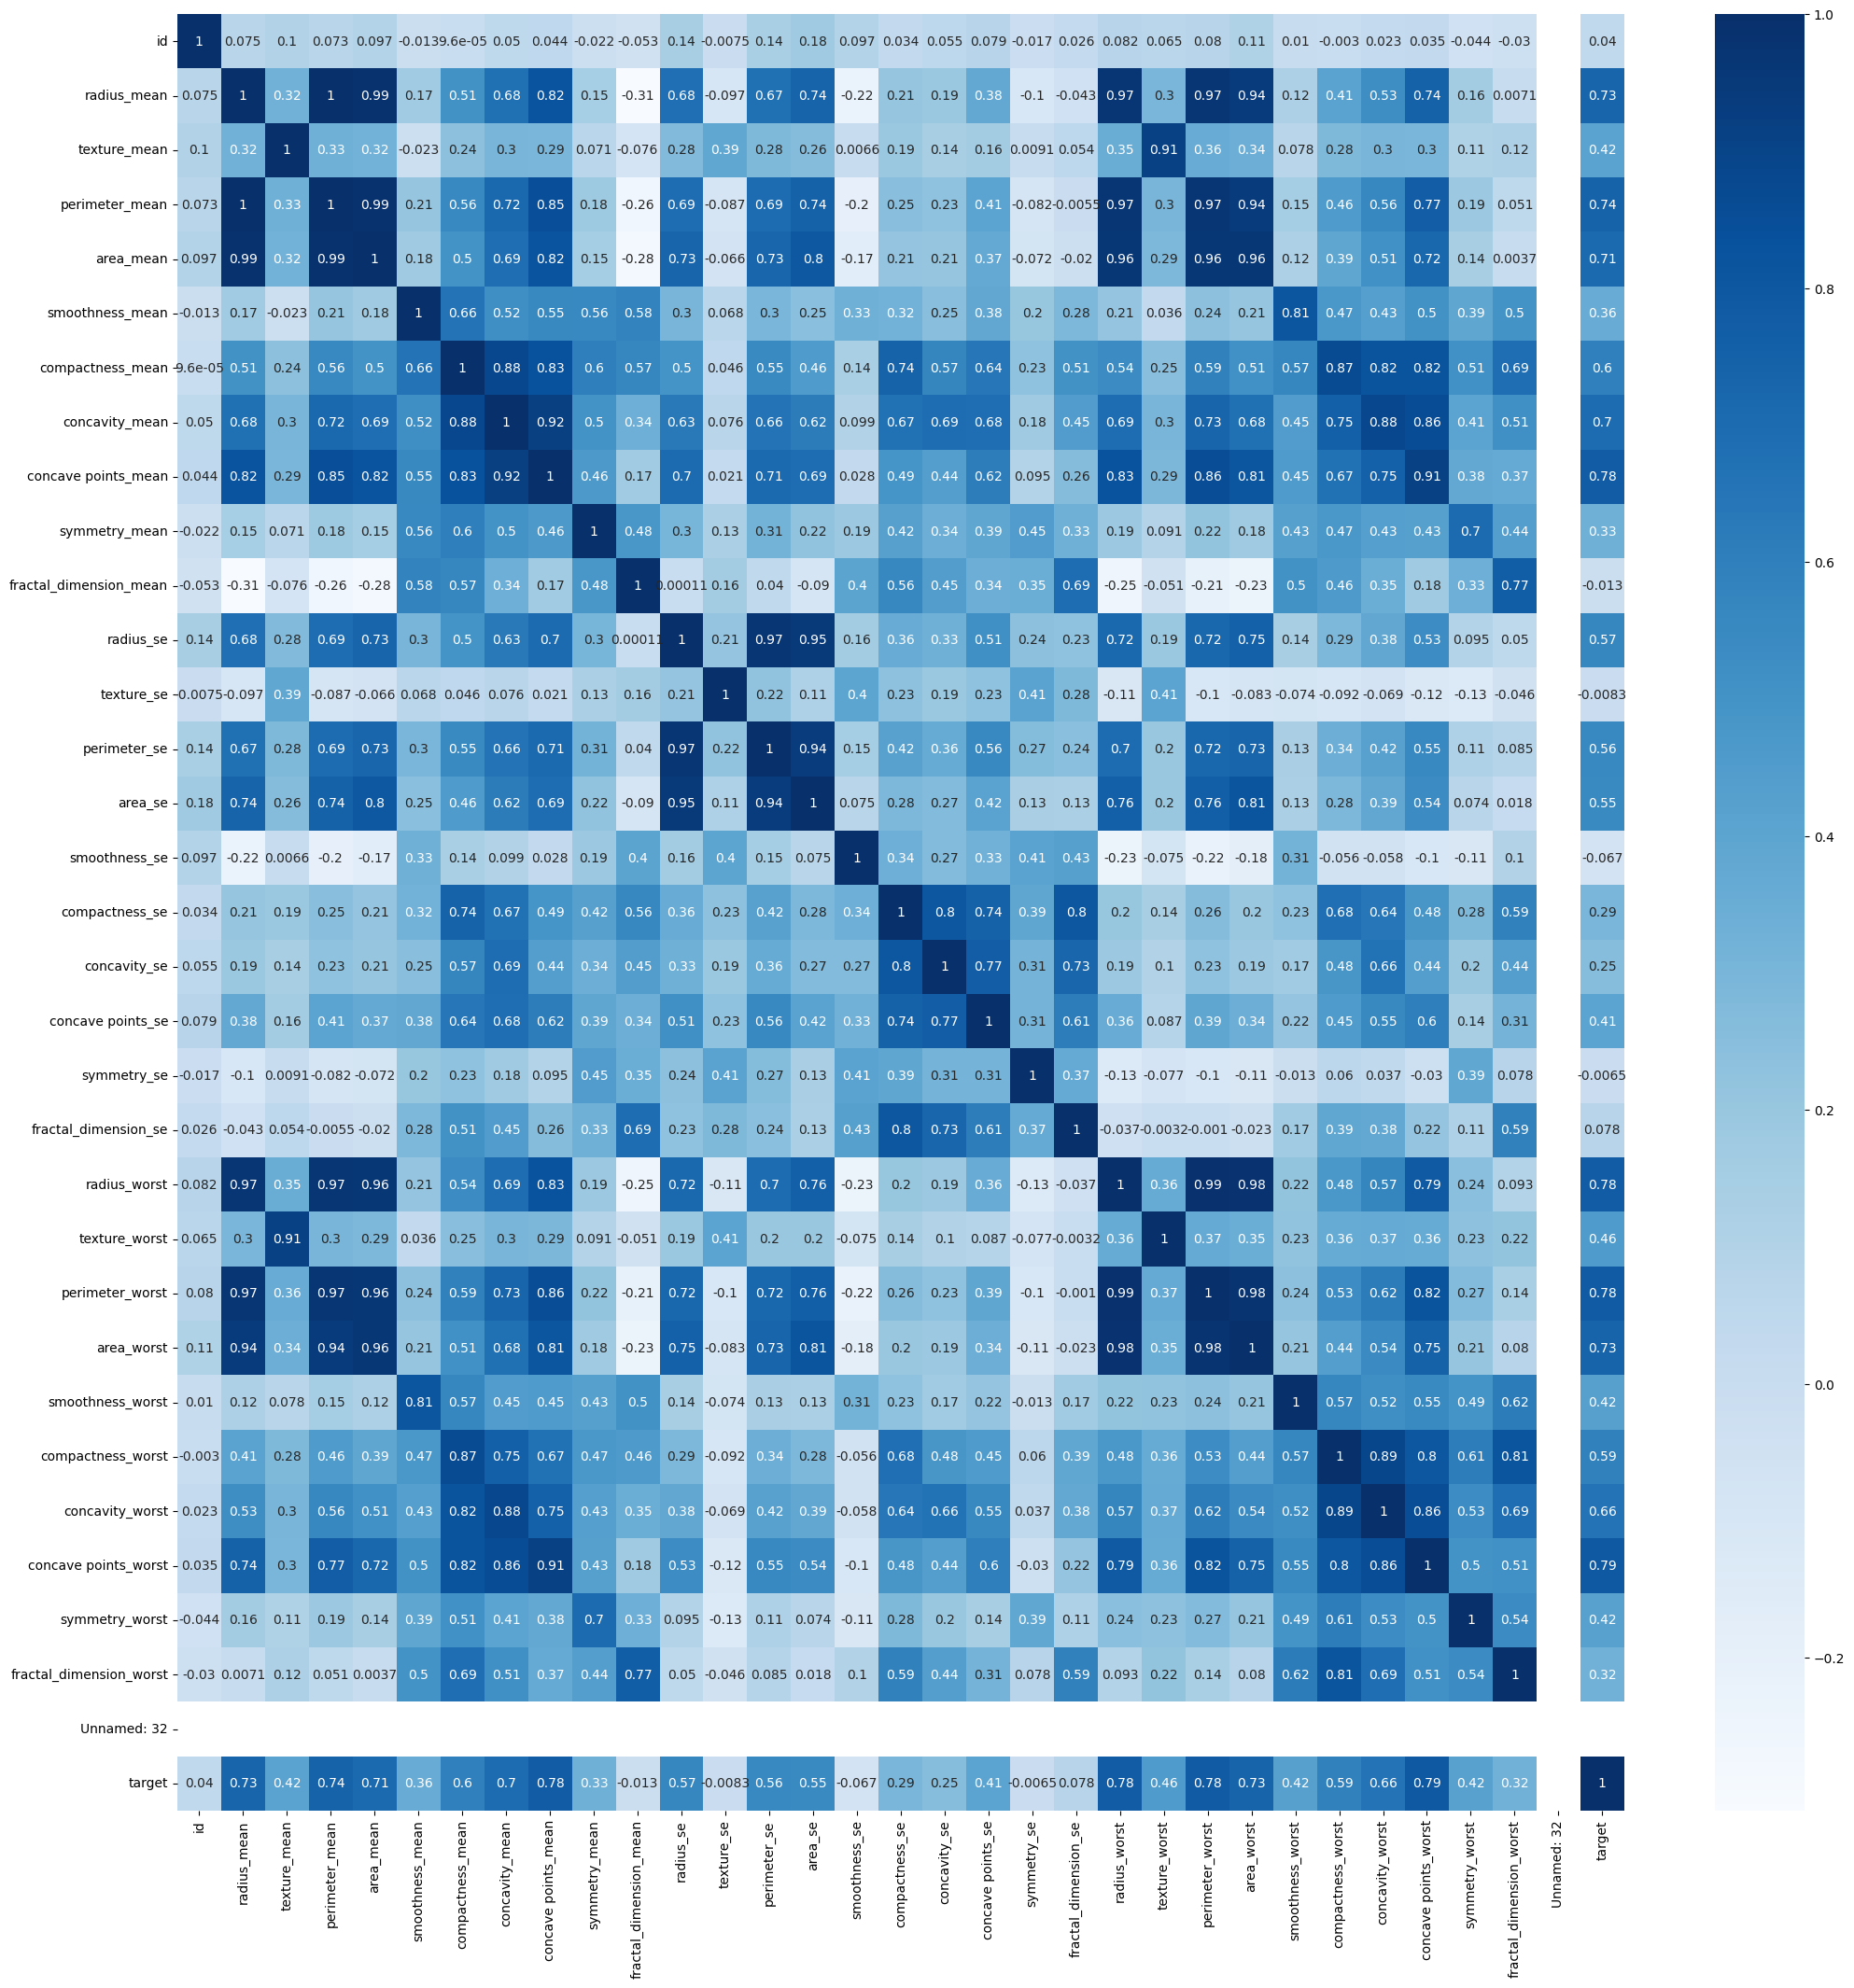

In [15]:
# Heatmap:-a two-dimensional representation of data in which various values are represented by colors.
fig, ax = plt.subplots(figsize=(25, 25))
sns.heatmap(df.corr(), annot = True,ax=ax,cmap='Blues')
plt.show()

### DATA PROCESSING

In [16]:
X = df.drop(columns = "target", axis = 1)
Y = df["target"]

In [17]:
print(X)

           id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302        17.99         10.38          122.80     1001.0   
1      842517        20.57         17.77          132.90     1326.0   
2    84300903        19.69         21.25          130.00     1203.0   
3    84348301        11.42         20.38           77.58      386.1   
4    84358402        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564    926424        21.56         22.39          142.00     1479.0   
565    926682        20.13         28.25          131.20     1261.0   
566    926954        16.60         28.08          108.30      858.1   
567    927241        20.60         29.33          140.10     1265.0   
568     92751         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              

In [18]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: target, Length: 569, dtype: int64


In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [20]:
print(X.shape, X_train.shape, X_test.shape)


(569, 32) (455, 32) (114, 32)


### MODEL TRAINING
### LOGOSTIC REGRESATION


In [21]:
# Initialize SimpleImputer to fill NaN values with the mean
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test= imputer.transform(X_test)

In [22]:
# Initialize and train the LogisticRegression model
lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression()

In [23]:
# accuracy on training data
Y_pred = lr.predict(X_train)
training_data_accuracy = accuracy_score(Y_pred, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.6329670329670329


In [24]:
# accuracy on test data
X_test_prediction = lr.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.6052631578947368


In [25]:
# confusion matrix
print('\nconfusion matrix:')
print(confusion_matrix(Y_test, X_test_prediction))

# classification report
print("\nclassification report:")
print(classification_report(Y_test, X_test_prediction))



confusion matrix:
[[69  0]
 [45  0]]

classification report:
              precision    recall  f1-score   support

           0       0.61      1.00      0.75        69
           1       0.00      0.00      0.00        45

    accuracy                           0.61       114
   macro avg       0.30      0.50      0.38       114
weighted avg       0.37      0.61      0.46       114



### KNN CLASSIFIER

In [26]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [27]:
# accuracy on training data
Y_pred = knn.predict(X_train)
training_data_accuracy = accuracy_score(Y_pred, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)


Accuracy on Training data :  0.8373626373626374


In [28]:
# accuracy on test data
X_test_prediction = knn.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.7982456140350878


In [29]:
# confusion matrix
print('\nconfusion matrix:')
print(confusion_matrix(Y_test, X_test_prediction))

# classification report
print("\nclassification report:")
print(classification_report(Y_test, X_test_prediction))




confusion matrix:
[[67  2]
 [21 24]]

classification report:
              precision    recall  f1-score   support

           0       0.76      0.97      0.85        69
           1       0.92      0.53      0.68        45

    accuracy                           0.80       114
   macro avg       0.84      0.75      0.76       114
weighted avg       0.83      0.80      0.78       114



In [30]:
input_data = (842302,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = lr.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print("The Breast cancer is Benign.")

else:
  print("The Breast Cancer is Malignant.")

[0]
The Breast cancer is Benign.


In [31]:
import pickle

In [32]:
filename =  "breast_cancer.sav"
pickle.dump(knn, open(filename, "wb"))

In [34]:
input_data = (842302,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = knn.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print("The Breast cancer is Benign.")

else:
  print("The Breast Cancer is Malignant.")

[1]
The Breast Cancer is Malignant.


In [35]:
for column in X.columns:
  print(column)

id
radius_mean
texture_mean
perimeter_mean
area_mean
smoothness_mean
compactness_mean
concavity_mean
concave points_mean
symmetry_mean
fractal_dimension_mean
radius_se
texture_se
perimeter_se
area_se
smoothness_se
compactness_se
concavity_se
concave points_se
symmetry_se
fractal_dimension_se
radius_worst
texture_worst
perimeter_worst
area_worst
smoothness_worst
compactness_worst
concavity_worst
concave points_worst
symmetry_worst
fractal_dimension_worst
Unnamed: 32


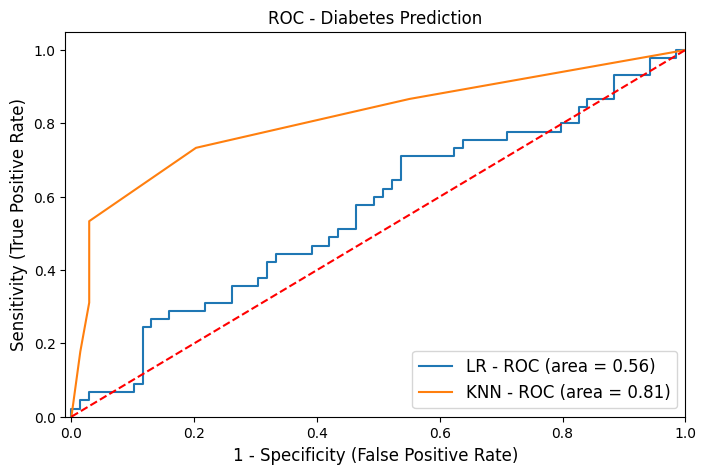

In [36]:
#ROC curve all prediction
# Plotting a graph
''' Multiclass Receiver Operating Characteristic
This example describes the use of the Receiver Operating Characteristic (ROC) metric
to evaluate the quality of multiclass classifiers. ROC curves typically feature
true positive rate (TPR) on the Y axis, and false positive rate (FPR) on the X axis.'''
import os
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

models = [
    {'label': 'LR', 'model': lr},
    {'label': 'KNN', 'model': knn}
]

for m in models:
    model = m['model']
    model.fit(X_train, Y_train)

    # Check if the model supports probability estimates
    if hasattr(model, 'predict_proba'):
        Y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred_proba)
        auc = metrics.roc_auc_score(Y_test, Y_pred_proba)
        plt.plot(fpr, tpr, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Diabetes Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)

# Create the 'outputs' directory if it does not exist
output_dir = 'outputs'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

plt.savefig(os.path.join(output_dir, 'roc_diabetes.jpeg'), format='jpeg', dpi=400, bbox_inches='tight')
plt.show()